In [35]:
import pandas as pd
import numpy as np


In [36]:
data=pd.read_csv("tweets.csv")
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [37]:
data.isnull().any()

id          False
keyword     False
location     True
text        False
target      False
dtype: bool

In [38]:
data.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [39]:
data.shape

(11370, 5)

In [40]:
data["location"].fillna(method='bfill',inplace=True)
data.isnull().sum()
np.where(data.isnull())

C:\Users\sagar\AppData\Local\Temp\ipykernel_2520\1888906613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["location"].fillna(method='bfill',inplace=True)
C:\Users\sagar\AppData\Local\Temp\ipykernel_2520\1888906613.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["location"].fillna(method='bfill',inplace=True)


(array([11369]), array([2]))

In [41]:
data["location"].fillna(method='ffill',inplace=True)
data.isnull().sum()

C:\Users\sagar\AppData\Local\Temp\ipykernel_2520\1554807350.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["location"].fillna(method='ffill',inplace=True)


id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [42]:
data.head(7)


,id,keyword,location,text,target
0,0,ablaze,New York City,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,New York City,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,OC,"""Lord Jesus, your love brings freedom and pard...",0
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1


In [43]:
columns=[]
for i in data.columns:
    columns.append(i)
columns

['id', 'keyword', 'location', 'text', 'target']

In [44]:
import numpy as np 
for i in columns:
    print("number of unique values in",i,"=",len(np.unique(data[i])))

number of unique values in id = 11370
number of unique values in keyword = 219
number of unique values in location = 4504
number of unique values in text = 11223
number of unique values in target = 2


In [45]:
from sklearn.preprocessing import LabelEncoder


In [46]:
data['keyword']=LabelEncoder().fit_transform(data['keyword'])
data['location']=LabelEncoder().fit_transform(data['location'])


In [47]:
data.head()

,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [48]:
true_disaster=[]
false_disaster=[]
for i in data['target']:
    if i==1:
        true_disaster.append(i)
    else:
        false_disaster.append(i)
print("percentage of True disaster tweets=",(len(true_disaster)/len(data['target']))*100)
print("percentage of False disastser tweets=",(len(false_disaster)/len(data['target']))*100)

percentage of True disaster tweets= 18.59278803869833
percentage of False disastser tweets= 81.40721196130167


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 2114 artists>

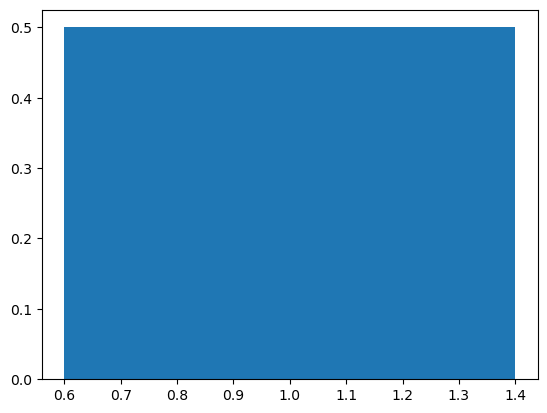

In [50]:
plt.bar(x=true_disaster,height=0.5)

<BarContainer object of 9256 artists>

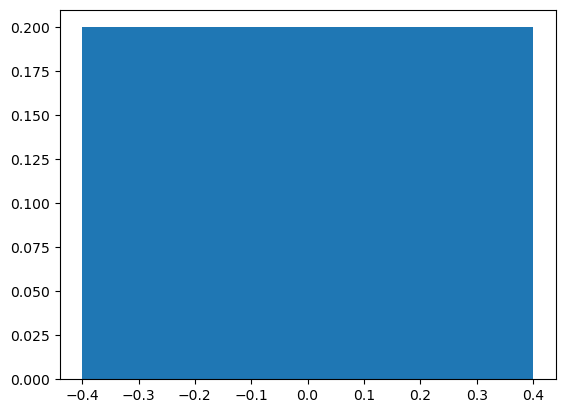

In [51]:
plt.bar(x=false_disaster,height=0.2)

<Axes: xlabel='target', ylabel='count'>

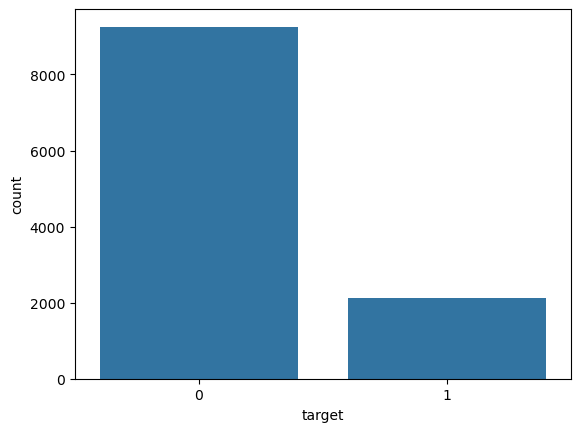

In [52]:
sns.countplot(x='target',data=data)

<Axes: xlabel='location', ylabel='count'>

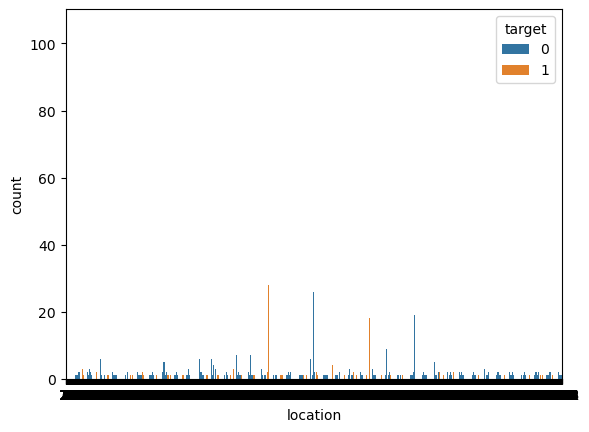

In [53]:
sns.countplot(x='location',hue='target',data=data)

<Axes: xlabel='target', ylabel='count'>

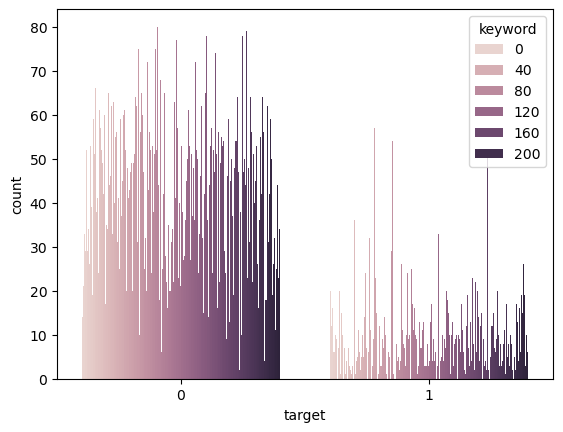

In [54]:
sns.countplot(x='target',hue='keyword',data=data)

In [55]:
data.head()


,id,keyword,location,text,target
0,0,0,2265,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,0,2265,Telangana: Section 144 has been imposed in Bha...,1
2,2,0,2265,Arsonist sets cars ablaze at dealership https:...,1
3,3,0,2104,Arsonist sets cars ablaze at dealership https:...,1
4,4,0,2389,"""Lord Jesus, your love brings freedom and pard...",0


In [56]:
data.drop(["id","keyword","location"],axis=1,inplace=True)


In [57]:
data.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [59]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer



In [60]:
x= data['text']
y= data['target']
y=np.array(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [61]:
tokenizer = Tokenizer(num_words=5000,lower=True)
tokenizer.fit_on_texts(x)
len(tokenizer.word_index)
dict_size=len(tokenizer.word_index)+1
print(dict_size)

30730


In [62]:
from keras.preprocessing.sequence import pad_sequences

In [63]:
encoded_sequence= tokenizer.texts_to_sequences(x)
final_input=pad_sequences(encoded_sequence,maxlen=200,padding='pre')

In [66]:
x[0]
len(x[0])

125

In [67]:
encoded_sequence[0]
len(encoded_sequence[0])

17

In [68]:
final_input[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [86]:
final_output=y

In [87]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional,SpatialDropout1D,Dropout

In [88]:
dimension=32
model=Sequential()
model.add(Embedding(dict_size,dimension,input_shape=(200,)))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [89]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 200, 32)             │         983,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_6                  │ (None, 200, 32)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 200, 50)             │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 200, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 200, 120)            │          82,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 200, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 40)                  │          25,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,107,841 (4.23 MB)

 Trainable params: 1,107,841 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
prediction=model.fit(final_input,final_output,epochs=7,batch_size=32)

Epoch 1/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.8222 - loss: 0.4553
Epoch 2/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.8742 - loss: 0.3163
Epoch 3/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.9103 - loss: 0.2462
Epoch 4/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.9223 - loss: 0.2168
Epoch 5/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.9271 - loss: 0.2049
Epoch 6/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 42s 119ms/step - accuracy: 0.9362 - loss: 0.1831
Epoch 7/7
356/356 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step - accuracy: 0.9454 - loss: 0.1634


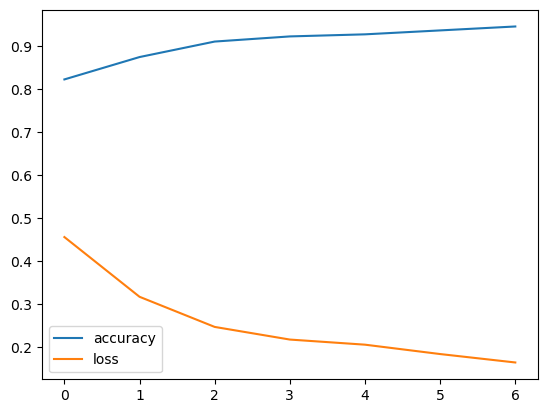

In [92]:
plt.plot(prediction.history['accuracy'],label='accuracy')
plt.plot(prediction.history['loss'],label='loss')
plt.legend(loc='best')
plt.show()

In [105]:
def predict_disaster(tweet):
    # put tweet into a list
    l = [tweet]
    
    # convert text to sequence
    sequence = tokenizer.texts_to_sequences(l)
    
    # pad sequence to match training input length
    pad_seq = pad_sequences(sequence, maxlen=80, padding='pre')
    
    # get prediction (probability)
    output = model.predict(pad_seq)
    
    # classify based on threshold (0.5)
    if output.round()[0][0] == 1:
        print("✅ True, it's a true news after disaster")
    else:
        print("❌ This is a false news")

        

In [106]:
predict_disaster("Communal violence in Bhainsa,Telangana.Stones were pelted on muslims houses and some houses and vehicles were set ablze")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
✅ True, it's a true news after disaster


In [107]:
predict_disaster('Breaking news:Nigeria flag set ablaze in Aba.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
❌ This is a false news
